Name: Shiska Raut <br>
ID: 1001526329

In [175]:
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline

## Read training/evaluation data

**Argument(s):** 
1) filename: name of a .txt file with each line containing training/evaluation features(x) and label(y) in the following format:
((x1, x2, .....xn), y) <br>
2) dtype_x : datatype of features <br>
3) dtype_y: datatype of label <br>

**Return(s):** 'X, Y' where X is a numpy array of feature vectors and Y is the target label vector.
Note: Each column in the array(s) epresents a single datapoint.

In [176]:
def get_X_Y_arrays(filename, dtype_x, dtype_y):
    try:
        f = open(filename, 'r')
    except OSError:
        print(f'{filename} could not be opened.\n')
        sys.exit()
        
    # initialize list to store feature and labels for training data
    features = []             
    labels = []
    
    with f:
        line = f.readline()
        while line != '':
            # strip newline and outer parenthesis
            line = line.strip('\n')
            line = line.strip('( )')
            
            # extrace label and append to labels list
            single_label = line.split('), ')[-1]
            labels.append(single_label)
            
            # extrace features and append to features list
            feat = line.split('), ')[0].split(', ')
            features.append(feat)
            
            # read next line
            line = f.readline()
        
        # create dataframe of features and append labels
        X = np.array(features, dtype = dtype_x, ndmin = 2)
        
        # convert labels list to array
        Y = np.array(labels, dtype = dtype_y, ndmin = 2)
        
        return X.transpose(), Y

## Read test data

**Argument(s):** 
1) name of a .txt file with each line containing test features(x) in the following format:
(x1, x2, .....xn) <br>
2) dtype_x: datatype of features

**Return(s):** 'X' where X is a numpy array of feature vectors.
Note: Each column in the array(s) epresents a single datapoint.

In [177]:
def get_X_array(filename, dtype_x):
    try:
        f = open(filename, 'r')
    except OSError:
        print(f'{filename} could not be opened.\n')
        sys.exit()
        
    # initialize list to store feature and labels for training data
    features = []             
    
    with f:
        line = f.readline()
        while line != '':
            
            # get feature values
            line = line.strip('\n')
            line = line.strip('( )')
            feat = line.split(', ')
            features.append(feat)
            
            # read next line
            line = f.readline()
        
        # create dataframe of features and append labels
        X = np.array(features, dtype = dtype_x, ndmin = 2)
        
        return X.transpose()

# 1) Linear Regression 

### Helper Functions 

In [178]:
# k = frequency increment
# d = function depth
# given input datapoint 'x_sample', 
# returns transformed version of the intput datapoint as a numpy array
def get_feature_vector(x_sample, k, d):
    
    # stored transformed values in a list
    trans_feat_list = []
    
    # append 1 and value of 'x_sample' to the list
    trans_feat_list.append(float(1))
    trans_feat_list.append(float(x_sample))
    
    # remaining transformations will be based on 'k' and 'd'
    for i in range(1, d+1):
        val1 = (np.sin(i*k*x_sample, dtype = float)**(i*k))*np.cos(x_sample, dtype = float)
        trans_feat_list.append(val1)
        val2 = (np.cos(i*k*x_sample, dtype = float)**(i*k))*np.sin(x_sample, dtype = float)
        trans_feat_list.append(val2)
    
    # convert list into array
    x_sample_trans = np.array(trans_feat_list, dtype = float, ndmin = 2).transpose()

    # return transformed features
    return x_sample_trans


# calculates sample squared error
def get_sample_squared_error(y_sample, y_pred):
    
    # calculate and return squared error
    return np.square(y_sample - y_pred)


# get sum of squared error for an entire test dataset
def get_sum_of_squared_error(Y_pred, Y_test):

    sum_of_sq_err = np.sum((Y_pred - Y_test)**2, axis = 1)

    return sum_of_sq_err


# get's prediction value for a sample
def get_prediction_value(x_sample, model_params, k, d):
    
    y_pred = np.dot(model_params, get_feature_vector(x_sample, k, d))

    # return prediction value as a scalar
    return y_pred[0, 0]
    

## 1 a)
## Model Training & Prediction

In [300]:
# returns predicted values for a given test data
def get_prediction(X, model_params, k, d):
    
    # save number of test samples
    n_feat, n_samples = X.shape
    
    # initialize list to store prediction values
    predictions = []
    
    for i in range(n_samples):
        y_pred = get_prediction_value(X[:,i][0], model_params, k, d)
        predictions.append(y_pred)

    Y_pred = np.array(predictions, dtype = float, ndmin = 2)
        
    return Y_pred


# trains a linear regression model 
def train_model(X_train, Y_train, epochs, alpha, k, d):
    
    # get number of training samples
    n_feat, n_samples = X_train.shape
    
    # get output dimension
    n_out, __ = Y_train.shape
    
    # initialize parameter vector
    model_params = np.random.rand(n_out, (2*d)+2)
    gradient_vec = np.zeros((n_out, (2*d)+2), dtype = float)

    # do this per epoch
    for i in range(epochs):    
        for j in range(n_samples):
            
            # pick a sample randomly
            idx = np.random.randint(0, n_samples)
            x_sample = X_train[:,idx]
            y_sample = Y_train[:,idx]
            
            # get prediction value and adjust weights
            y_pred = get_prediction_value(x_sample[0], model_params, k, d)
            gradient_vec = gradient_vec + (y_pred - y_sample[0])*(get_feature_vector(x_sample[0], k, d).transpose())
            
        # adjust parameter values using batch gradient descent   
        model_params = model_params - (alpha*gradient_vec)
    # return final parameter vector
    return model_params

### Plot resulting function

**Arguments**:
1) model_params: function parameters
2) X, Y : Original datapoints
3) k = frequency increment
4) d = function depth
5) n_values: number of domain values for plotting

In [301]:
def plot_function(model_params, X_train, Y_train, k, d, n_values):
    
    # create domain for plotting function
    X_range = np.linspace(np.amin(X_train), np.amax(X_train)+0.1, n_values)
    
    # convert array to 1D
    X_train = X_train.squeeze()
    Y_train = Y_train.squeeze()
    
    # get function values for x domain values
    Y_pred = get_prediction(X_range.reshape(1, n_values), model_params, k, d)
    Y_pred = Y_pred.squeeze()
    
    # plot function values VS actual values for training data
    plt.figure(figsize = (10, 6))
    plt.plot(X_range, Y_pred, color = 'blue', linestyle = 'dashed')
    plt.scatter(X_train, Y_train, color = 'orange')
    
    plt.legend(['Function Value', 'Training Data'], loc = 2)
    title_str = f'Regression model for d = {d} and k = {k}'
    plt.title(title_str, fontdict = {'fontsize': 15})
    plt.xlabel('x', fontdict = {'fontsize': 12})
    plt.ylabel('y', fontdict = {'fontsize': 12})
    

### Provide training filename, alpha, number of epochs and function depth(d)
1) filename: name of a .txt file with each line containing training/evaluation features(x) and label(y) in the following format:
((x1, x2, .....xn), y) <br>

In [302]:

fname_train = str(input('Enter file containing training data: '))
alpha = float(input('Provide a learning rate(alpha): '))
epochs = int(input('Provide number of epochs: '))
d = int(input('Provide functional depth(d) value: '))

X_train, Y_train = get_X_Y_arrays(fname_train, float, float)
k = 8

# train model and print test data squared error and prediction
model_params = train_model(X_train, Y_train, epochs, alpha, k, d)

# plot prediction and actual value for training data
n_samples = X_train.shape[1]
plot_function(model_params, X_train, Y_train, k, d, n_samples)


KeyboardInterrupt: Interrupted by user

## 1 b)

In [309]:
fname_train = "1_b_c_2_train.txt"
X_train, Y_train = get_X_Y_arrays(fname_train, float, float)
epochs = 8
k = 8
ampha = 0.0001
n_samples = X_train.shape[1]

# initialize list to store model parameters, predictions and error for various function depths
model_params_list = []

# train model anf get parameters for d = 0 to 6
for d in range(0, 7):
    model_params = train_model(X_train, Y_train, epochs, alpha, k, d)
    model_params_list.append(model_params)

#### Model for d = 0

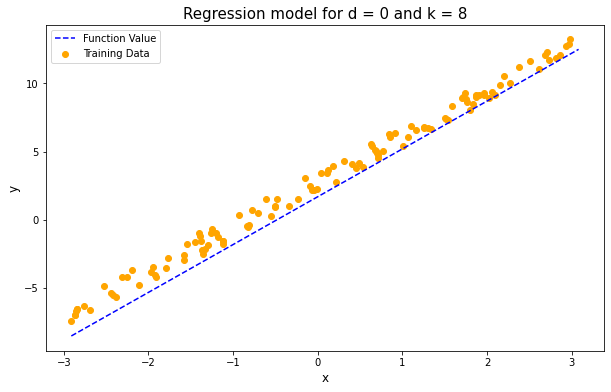

In [310]:
plot_function(model_params_list[0], X_train, Y_train, 8, 0, n_samples)

#### Model for d = 1

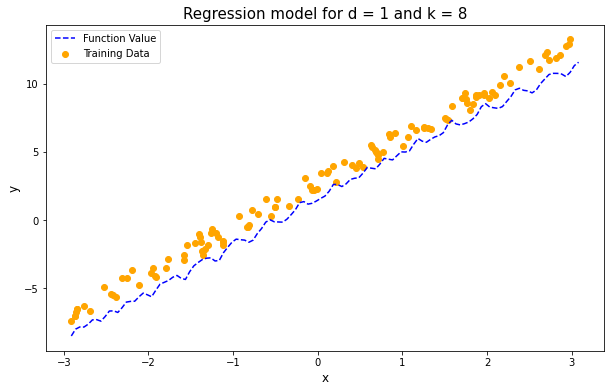

In [288]:
plot_function(model_params_list[1], X_train, Y_train, 8, 1, n_samples)

#### Model for d = 2

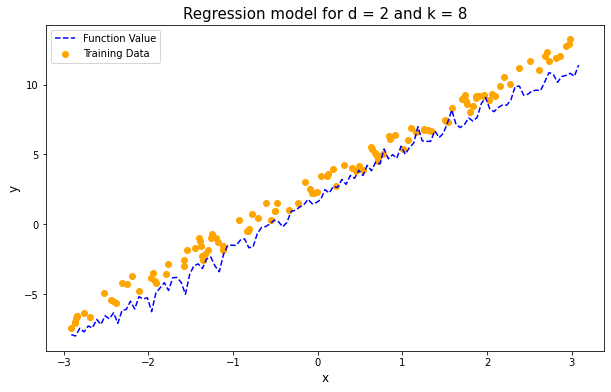

In [289]:
plot_function(model_params_list[2], X_train, Y_train, 8, 2, n_samples)

#### Model for d = 3

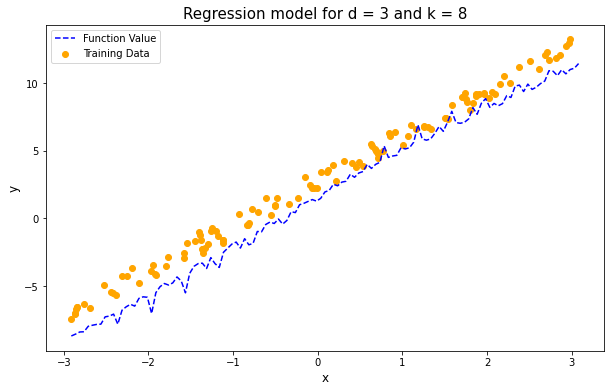

In [282]:
plot_function(model_params_list[3], X_train, Y_train, 8, 3, n_samples)

#### Model for d = 4

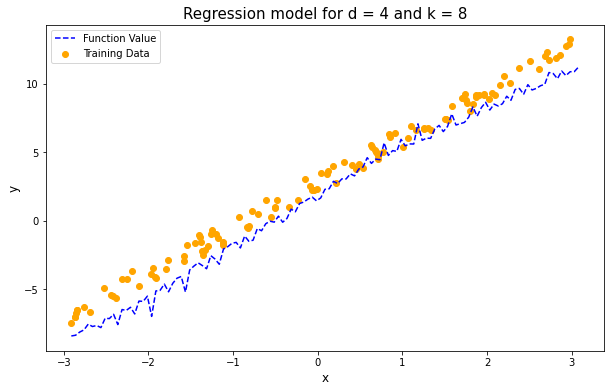

In [283]:
plot_function(model_params_list[4], X_train, Y_train, 8, 4, n_samples)

#### Model for d = 5

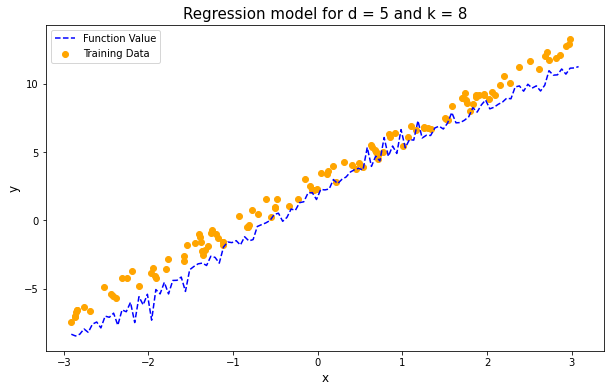

In [284]:
plot_function(model_params_list[5], X_train, Y_train, 8, 5, n_samples)

#### Model for d = 6

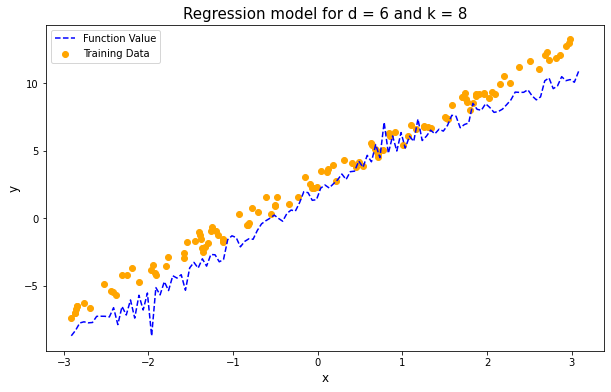

In [285]:
plot_function(model_params_list[6], X_train, Y_train, 8, 6, n_samples)

## 1 c)

In [217]:
fname_test = "1_c_test.txt"
X_test, Y_test = get_X_Y_arrays(fname_test, float, float)

# Locally Weighted Linear Regression

# 3) Softmax Regression

### Helper Functions

#### one_hot_encoder(arr) : return encoded_arr, label_idx_dict
**arr:** <br>
[['Ceramic' 'Metal' 'Metal' 'Metal' 'Ceramic' 'Plastic' 'Plastic'
  'Plastic' 'Plastic' 'Plastic' 'Plastic' 'Ceramic']]<br>  
**encoded_arr:** <br>
[[0 1 1 1 0 0 0 0 0 0 0 0]<br>
 [0 0 0 0 0 1 1 1 1 1 1 0]<br>
 [1 0 0 0 1 0 0 0 0 0 0 1]] <br>
**label_idx_dict:** <br>
{'Metal': 0, 'Plastic': 1, 'Ceramic': 2}

In [143]:
# given an array of attribute values for a categocial attribute,
# preforms one-hot-encoding and returns resulting binary array
def one_hot_encoder(arr):
    
    __, n_samples = arr.shape
    
    # get unique labels
    uniq_labels = set(arr[0,:].tolist())
    
    # get number of total attribute values
    n_labels = len(uniq_labels)
    
    # create an array of size n_labels*n_samples to store encoded values
    encoded_arr = np.zeros((n_labels, n_samples), dtype = int)
    
    # create dictionary to store row indev of each attribute value
    label_idx_dict = {}
    for i, v in enumerate(uniq_labels):
        label_idx_dict[v] = i
        
    # fill encoded_arr using attribute index dictionary and input arr
    for i in range(n_samples):
        # get index to encode as 1
        idx = label_idx_dict[arr[0,i]]
        encoded_arr[idx, i] = 1
        
    return encoded_arr, label_idx_dict


### Functions for Training and Prediction

In [177]:
# given a vector of parobaility values, returns label with max probability for a single sample
def get_sample_prediction_label(sfmax_net, label_idx_dict):
    
    # get inverse of the dictionary
    inv_label_idx_dict = {v: k for k, v in label_idx_dict.items()}
    
    # return label with max probability value
    return inv_label_idx_dict[int(np.argmax(sfmax_net, axis = 0))]


# uses softmax function and parameter matrix to get probability values
# for multiclass classification
def get_sample_prediction_values(x, model_params):
    
    # initialize column vector of ones to add bias
    x_sample = np.ones((x.shape[0]+1, 1), dtype = float)
    x_sample[1::] = x.reshape(x.shape[0], 1)
    
    # calculate linear net value
    net = np.dot(model_params, x_sample)
    
    # calculate exponential value for rach class
    exp_net = np.exp(net)
    
    # calculate softmax value for each class
    sfmax_net = exp_net/np.sum(exp_net, axis = 0)
    
    return sfmax_net

# gets predictions for an entire test dataset
def get_predictions(X_test, model_params, label_idx_dict):

    # initialize list to store predictions
    Y_pred = []

    # get number of test samples
    __, n_samples = X_test.shape


    for i in range(n_samples):

        y_pred_values = get_sample_prediction_values(X_test[:,i], model_params)
        y_pred_label = get_sample_prediction_label(y_pred_values, label_idx_dict)
        Y_pred.append(y_pred_label)

    # convert labels list to numpy array
    Y_pred = np.array(Y_pred, dtype = str, ndmin = 2)

    return Y_pred  


# trains a softmax regression model given training data, alpha and number of epochs
def train_softmax_regressor(X_train, Y_train, alpha, epochs):
    
    # get number of features and samples
    n_feat, n_samples = X_train.shape
    
    # get encoded array for y
    Y_train_encoded, label_idx_dict = one_hot_encoder(Y_train)
    
    # get no of classes/labels
    n_class, __ = Y_train_encoded.shape
    
    # get paramater matrix
    model_params = np.random.randn(n_class, n_feat+1)
    
    for i in range(epochs):
        for j in range(n_samples):
            
            # pick a sample randomly
            idx = np.random.randint(0, n_samples)
            x_sample = X_train[:,idx]
            y_sample = Y_train_encoded[:,idx].reshape(Y_train_encoded.shape[0], 1)
            
            # get prediction value and adjust weights
            y_pred = get_sample_prediction_values(x_sample, model_params)

            # add bias to x_sample before calculating gradient
            x_sample_b = np.ones((x_sample.shape[0]+1, 1), dtype = float)
            x_sample_b[1::] = x_sample.reshape(x_sample.shape[0], 1)

            # calculate gradient matrix
            gradient_mtx = np.dot((y_sample - y_pred), x_sample_b.transpose())
            
            # adjust parameter values using stochastic gradient ascent
            model_params = model_params + alpha*gradient_mtx
            
    # return final parameter matrix
    return model_params, label_idx_dict

### Function for leave-one-out evaluation

In [161]:
def leave_one_out_evaluation(X_eval, Y_eval, alpha, epochs):
    
    # get number of features and samples
    n_feat, n_samples = X_eval.shape
    
    # prediction labels generated by 'predict_class_with_knn' will be stored in this list
    Y_pred = []
    
    for i in range(n_samples):
        
        # pick test datapoint in order of the index
        x_test = X_eval[:,i]
        y_test = Y_eval[:,i]
        
        # create traiing set by deleting test datapoint
        X_train = np.delete(X_eval, i, axis = 1)
        Y_train = np.delete(Y_eval, i, axis = 1)
        
        # train model
        model_params, label_idx_dict = train_softmax_regressor(X_train, Y_train, alpha, epochs)
        
        # get test data prediction
        y_pred_values = get_sample_prediction_values(x_test, model_params)
        y_pred_label = get_sample_prediction_label(y_pred_values, label_idx_dict)
        Y_pred.append(y_pred_label)
    
    # convert prediction list to numpy array
    Y_pred = np.array(Y_pred, dtype = str, ndmin = 2)
    acc = (np.sum(Y_eval == Y_pred))/n_samples
    
    # return predictions and accuracy
    return Y_pred, acc


### Provide Filenames:
1) Training/evaluation file: name of a .txt file with each line containing training/evaluation features(x) and label(y) in the following format:
((x1, x2, .....xn), y)

2) Test file: name of a .txt file with each line containing test features(x) in the following format:
(x1, x2, .....xn)

In [150]:
'''
fname_train = str(input('Enter file containing training data: '))
fname_test = str(input('Enter file containing test data: '))
fname_eval = str(input('Enter file containing leave_one_out evaluation data: '))
alpha = float(input('Provide a learning rate(alpha): '))
epochs = int(input('Provide number of epochs: '))
'''
fname_train = '3_train.txt'
fname_test = '3_test.txt'
fname_eval = '3_eval.txt'
epochs = 3

X_train, Y_train = get_X_Y_arrays(fname_train)
X_test = get_X_array(fname_test)
X_eval, Y_eval = get_X_Y_arrays(fname_eval)

### b) Model Evaluation

**alpha = 0.00001, 0.00001, 0.0001 and 0.001**

In [156]:
Y_pred, acc = leave_one_out_evaluation(X_eval, Y_eval, 0.00001, 1)    

In [157]:
acc

0.325

### c) Evaluation after removing 4th attribute

In [158]:
X_eval_3 = np.delete(X_eval, 3, axis = 0)

In [168]:
X_eval_3[:,0]

array([0.10333502, 0.07922548, 0.18783852])

In [178]:
Y_pred, acc = leave_one_out_evaluation(X_eval_3, Y_eval, 0.00001, 5)    

In [179]:
acc

0.24166666666666667

In [8]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [10]:
x1 = x[0,0]
x1

1

In [11]:
x1 = 9

In [12]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [15]:
model_params = np.ones((3, 3+1))
model_params

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [20]:
model_params[:,1::] = np.random.randn(3, 3)
model_params

array([[ 1.        , -1.24045061, -1.52528838, -0.20853192],
       [ 1.        , -0.65145782,  1.44423166,  0.52975214],
       [ 1.        , -0.22391998,  0.75867958, -0.05067363]])

In [22]:
for d in range(0, 7):
    print(d)

0
1
2
3
4
5
6
